In [3]:
import os
from glob import glob
from copy import deepcopy

import umap
from sklearn.manifold import TSNE

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist, pdist, squareform

import torch

from local_utils import (
    init_embeddings,
    calculate_concept_centers,
    calculate_concept_center_distances,
    compute_top_n_per_doppelganger_pair,
    compute_top_n_per_sample,
)

In [7]:
embeddings_path = "../project/mworks01/20240201_224113/model_240000_lfw_deepfunneled_112x112_outputs.pth"
embeddings_image_path = "../project/mworks01/20240201_224113/model_240000_lfw_deepfunneled_112x112_image_paths.txt"

image_dir = "/home/nthom/Documents/opensphere/data/val/lfw_deepfunneled_112x112/"

embeddings_df = init_embeddings(embeddings_path, embeddings_image_path, image_dir)
print(embeddings_df["class"])

0           Colin_Powell
1            Queen_Rania
2         Jamling_Norgay
3             Chris_Rock
4             Tim_Conway
              ...       
13228    Hillary_Clinton
13229       Alvaro_Uribe
13230     Chung_Mong-hun
13231          Jim_Piper
13232     Robert_Redford
Name: class, Length: 13233, dtype: object


In [13]:
# # Create a StratifiedShuffleSplit object
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
# # Get the index of rows for the stratified sample
# for train_index, sample_index in sss.split(embeddings_df, embeddings_df['class_num']):
#     stratified_sample = embeddings_df.loc[sample_index]
stratified_sample = deepcopy(embeddings_df)
stratified_sample = stratified_sample[stratified_sample["class_num"].isin(range(100))]

concept_centers_df = calculate_concept_centers(stratified_sample)
unique_class_nums = stratified_sample["class_num"].unique()
concept_centers_df["class_num"] = unique_class_nums

concept_centers_df["is_center"] = 1
stratified_sample["is_center"] = 0

stratified_sample = pd.concat([stratified_sample, concept_centers_df], ignore_index=True)

stratified_sample.drop(["class", "path"], axis=1, inplace=True)

In [14]:
# Create a UMAP projection of the features
umap_reducer = umap.UMAP()
umap_features = umap_reducer.fit_transform(
    stratified_sample.drop(["class_num", "is_center"], axis=1)
)

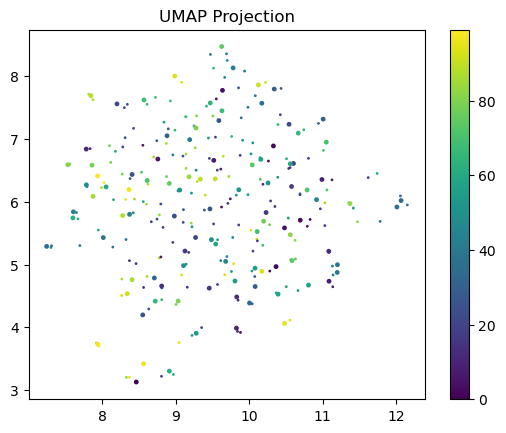

class_num
20    20
52    13
84     9
87     8
60     6
      ..
1      2
8      2
76     2
19     2
10     2
Name: count, Length: 100, dtype: int64
21     0
114    0
165    0
170    0
217    1
Name: is_center, dtype: int64
[[ 9.624567   5.9160576]
 [ 9.881777   3.9197044]
 [ 9.743342   6.0461493]
 [10.789963   5.608468 ]
 [10.48043    5.583831 ]]


In [15]:
# Plot the UMAP projection
plt.figure()
plt.scatter(
    umap_features[:, 0],
    umap_features[:, 1],
    c=stratified_sample["class_num"],
    cmap="viridis",
    s=stratified_sample["is_center"] * 5 + 1
    # s=5
)
plt.colorbar()
plt.title("UMAP Projection")
plt.show()

print(stratified_sample["class_num"].value_counts())
print(stratified_sample[stratified_sample["class_num"]==5]["is_center"])
print(umap_features[stratified_sample["class_num"]==5])

In [ ]:
# Create a TSNE projection of the features
tsne = TSNE(n_components=2)
tsne_features = tsne.fit_transform(
    stratified_sample.drop(["class_num", "is_center"], axis=1)
)

In [ ]:
# Plot the TSNE projection
plt.figure()
plt.scatter(
    tsne_features[:, 0],
    tsne_features[:, 1],
    c=stratified_sample["class_num"],
    cmap="viridis",
    s=1
)
plt.colorbar()
plt.title("TSNE Projection")
plt.show()